In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

# Import Data

In [ ]:
dates = ['220402','220409','220416' ,'220423','220430','220507' ,'220514','220521','220528','220604']

data_list = []
for data_time in dates:
    data_link = f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{data_time}.txt"            
    data_list.append(pd.read_csv(data_link))
        
MTA_dt = pd.concat(data_list).reset_index(drop=True)

In [4]:
MTA_dt[:10]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,00:00:00,REGULAR,7697197,2683684
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,04:00:00,REGULAR,7697200,2683687
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,08:00:00,REGULAR,7697204,2683713
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,12:00:00,REGULAR,7697219,2683805
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,16:00:00,REGULAR,7697278,2683874
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,20:00:00,REGULAR,7697339,2683928
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2022,00:00:00,REGULAR,7697362,2683972
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2022,04:00:00,REGULAR,7697367,2683977
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2022,08:00:00,REGULAR,7697370,2684008
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2022,12:00:00,REGULAR,7697387,2684073


# Cleaning Data

In [5]:
# Removed whitespaces from column names
MTA_dt.columns = [c.strip() for c in MTA_dt.columns]   

In [6]:
# The DATE and TIME columns were merged and converted to datetime format.

MTA_dt["DATETIME"]= pd.to_datetime(MTA_dt['DATE'] + ' ' + MTA_dt['TIME'])       

In [7]:
#C/A , UNIT and SCP columns that changed together were combined into a new column called ID.
MTA_dt['ID']=MTA_dt['C/A']+','+MTA_dt.UNIT+','+MTA_dt.SCP          

In [8]:
#removed duplicated data

MTA_dt.drop_duplicates(subset=["ID","STATION", "DATETIME"], inplace=True)     

In [9]:
MTA_dt

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ID
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,00:00:00,REGULAR,7697197,2683684,2022-03-26 00:00:00,"A002,R051,02-00-00"
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,04:00:00,REGULAR,7697200,2683687,2022-03-26 04:00:00,"A002,R051,02-00-00"
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,08:00:00,REGULAR,7697204,2683713,2022-03-26 08:00:00,"A002,R051,02-00-00"
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,12:00:00,REGULAR,7697219,2683805,2022-03-26 12:00:00,"A002,R051,02-00-00"
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,16:00:00,REGULAR,7697278,2683874,2022-03-26 16:00:00,"A002,R051,02-00-00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112683,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,05:00:00,REGULAR,0,433,2022-06-03 05:00:00,"TRAM2,R469,00-05-01"
2112684,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,09:00:00,REGULAR,0,433,2022-06-03 09:00:00,"TRAM2,R469,00-05-01"
2112685,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,13:00:00,REGULAR,0,433,2022-06-03 13:00:00,"TRAM2,R469,00-05-01"
2112686,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,17:00:00,REGULAR,0,435,2022-06-03 17:00:00,"TRAM2,R469,00-05-01"


# Total Pass Per Day Per By Turnstile

Because of the input and output data are cumulative,, each day's inputs and outputs were calculated by subtracting the lowest value from the highest value for that day.

In [10]:
Mta_net_entry = MTA_dt.groupby(["ID","STATION","DATE"]).ENTRIES.max() - MTA_dt.groupby(["ID","STATION","DATE"]).ENTRIES.min()

In [11]:
Mta_net_exit = MTA_dt.groupby(["ID","STATION","DATE"]).EXITS.max() - MTA_dt.groupby(["ID","STATION","DATE"]).EXITS.min()

In [12]:
Mta_net_entry

ID                   STATION        DATE      
A002,R051,02-00-00   59 ST          03/26/2022    142
                                    03/27/2022    110
                                    03/28/2022    244
                                    03/29/2022    329
                                    03/30/2022    273
                                                 ... 
TRAM2,R469,00-05-01  RIT-ROOSEVELT  05/30/2022      0
                                    05/31/2022      0
                                    06/01/2022      0
                                    06/02/2022      0
                                    06/03/2022      0
Name: ENTRIES, Length: 352110, dtype: int64

In [13]:
Mta_net_exit

ID                   STATION        DATE      
A002,R051,02-00-00   59 ST          03/26/2022    244
                                    03/27/2022    195
                                    03/28/2022    517
                                    03/29/2022    512
                                    03/30/2022    535
                                                 ... 
TRAM2,R469,00-05-01  RIT-ROOSEVELT  05/30/2022     18
                                    05/31/2022      1
                                    06/01/2022      4
                                    06/02/2022      2
                                    06/03/2022      2
Name: EXITS, Length: 352110, dtype: int64

In [14]:
Mta_net_pass = pd.merge(Mta_net_entry.reset_index(),Mta_net_exit.reset_index())       

In [15]:
Mta_net_pass

,ID,STATION,DATE,ENTRIES,EXITS
0,"A002,R051,02-00-00",59 ST,03/26/2022,142,244
1,"A002,R051,02-00-00",59 ST,03/27/2022,110,195
2,"A002,R051,02-00-00",59 ST,03/28/2022,244,517
3,"A002,R051,02-00-00",59 ST,03/29/2022,329,512
4,"A002,R051,02-00-00",59 ST,03/30/2022,273,535
...,...,...,...,...,...
352105,"TRAM2,R469,00-05-01",RIT-ROOSEVELT,05/30/2022,0,18
352106,"TRAM2,R469,00-05-01",RIT-ROOSEVELT,05/31/2022,0,1
352107,"TRAM2,R469,00-05-01",RIT-ROOSEVELT,06/01/2022,0,4
352108,"TRAM2,R469,00-05-01",RIT-ROOSEVELT,06/02/2022,0,2


In [16]:
Mta_net_pass['DATE'] = pd.to_datetime(Mta_net_pass['DATE'])        

In [17]:
Mta_net_pass

,ID,STATION,DATE,ENTRIES,EXITS
0,"A002,R051,02-00-00",59 ST,2022-03-26,142,244
1,"A002,R051,02-00-00",59 ST,2022-03-27,110,195
2,"A002,R051,02-00-00",59 ST,2022-03-28,244,517
3,"A002,R051,02-00-00",59 ST,2022-03-29,329,512
4,"A002,R051,02-00-00",59 ST,2022-03-30,273,535
...,...,...,...,...,...
352105,"TRAM2,R469,00-05-01",RIT-ROOSEVELT,2022-05-30,0,18
352106,"TRAM2,R469,00-05-01",RIT-ROOSEVELT,2022-05-31,0,1
352107,"TRAM2,R469,00-05-01",RIT-ROOSEVELT,2022-06-01,0,4
352108,"TRAM2,R469,00-05-01",RIT-ROOSEVELT,2022-06-02,0,2


In [18]:
Mta_net_pass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352110 entries, 0 to 352109
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   ID       352110 non-null  object        
 1   STATION  352110 non-null  object        
 2   DATE     352110 non-null  datetime64[ns]
 3   ENTRIES  352110 non-null  int64         
 4   EXITS    352110 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 16.1+ MB


In [19]:
#The DAY column has been added to sort our data by day of the week.
Mta_net_pass['DAY']= Mta_net_pass['DATE'].dt.day_name()                    

In [20]:
# Added DAY_ORDER column showing the number of days starting from Sunday 0 in order to be able to sort the days.
Mta_net_pass['DAY_ORDER']= Mta_net_pass['DATE'].dt.weekday                  

In [21]:
#The TOTAL_PASS column, which was created by collecting daily entries and exits on the basis of turnstile, was added to the data.
Mta_net_pass['TOTAL_PASS'] = Mta_net_pass["ENTRIES"]+Mta_net_pass["EXITS"]    

In [22]:
Mta_net_pass

,ID,STATION,DATE,ENTRIES,EXITS,DAY,DAY_ORDER,TOTAL_PASS
0,"A002,R051,02-00-00",59 ST,2022-03-26,142,244,Saturday,5,386
1,"A002,R051,02-00-00",59 ST,2022-03-27,110,195,Sunday,6,305
2,"A002,R051,02-00-00",59 ST,2022-03-28,244,517,Monday,0,761
3,"A002,R051,02-00-00",59 ST,2022-03-29,329,512,Tuesday,1,841
4,"A002,R051,02-00-00",59 ST,2022-03-30,273,535,Wednesday,2,808
...,...,...,...,...,...,...,...,...
352105,"TRAM2,R469,00-05-01",RIT-ROOSEVELT,2022-05-30,0,18,Monday,0,18
352106,"TRAM2,R469,00-05-01",RIT-ROOSEVELT,2022-05-31,0,1,Tuesday,1,1
352107,"TRAM2,R469,00-05-01",RIT-ROOSEVELT,2022-06-01,0,4,Wednesday,2,4
352108,"TRAM2,R469,00-05-01",RIT-ROOSEVELT,2022-06-02,0,2,Thursday,3,2


# On the basis of turnstiles, I filtered them according to turnstiles whose total number of daily passes (TOTAL_PASS) is less than 40.000 and greater than 1500. Why 40,000: If one person passes in 4 seconds, 21600 people will enter and 21600 people will leave, making a total of 43200 people. I rounded it down to 40,000. Why 1500: 1 person per minute passes through a turnstile, which makes 1440 people a day. Since our aim is to find stations with a lot of traffic, I thought that there should be a daily pass for at least 1500 people.


In [23]:
Mta_pass_filtered = Mta_net_pass.loc[(Mta_net_pass.TOTAL_PASS < 40000)& (Mta_net_pass.TOTAL_PASS > 1500)].sort_values("TOTAL_PASS",ascending=False).reset_index()

In [24]:
Mta_pass_filtered 

,index,ID,STATION,DATE,ENTRIES,EXITS,DAY,DAY_ORDER,TOTAL_PASS
0,199408,"PTH03,R552,00-01-08",JOURNAL SQUARE,2022-04-19,21067,15909,Tuesday,1,36976
1,239922,"R155,R116,01-00-08",50 ST,2022-04-12,7282,27976,Tuesday,1,35258
2,207570,"PTH13,R541,00-00-07",THIRTY ST,2022-04-26,17834,17290,Tuesday,1,35124
3,199415,"PTH03,R552,00-01-08",JOURNAL SQUARE,2022-04-26,19391,15143,Tuesday,1,34534
4,199417,"PTH03,R552,00-01-08",JOURNAL SQUARE,2022-04-28,18854,14906,Thursday,3,33760
...,...,...,...,...,...,...,...,...,...
65824,261985,"R215,R322,00-00-02",SPRING ST,2022-05-25,1207,294,Wednesday,2,1501
65825,297411,"R316,R407,00-00-02",INTERVALE AV,2022-05-09,990,511,Monday,0,1501
65826,296202,"R311,R053,00-00-02",3 AV-149 ST,2022-04-20,518,983,Wednesday,2,1501
65827,277452,"R243,R049,00-05-01",51 ST,2022-05-24,345,1156,Tuesday,1,1501


In [25]:
Crowded_stations = Mta_pass_filtered.groupby(["STATION"]).sum().sort_values("TOTAL_PASS" , ascending=False)


In [31]:
Crowded_stations

,index,ENTRIES,EXITS,DAY_ORDER,TOTAL_PASS
STATION,,,,,
14 ST-UNION SQ,167287960,1576377,3017982,4824,4594359
34 ST-HERALD SQ,169016468,1560899,2733577,4468,4294476
34 ST-PENN STA,340376159,1396893,2874409,4486,4271302
GRD CNTRL-42 ST,375043123,1359865,2656826,3312,4016691
42 ST-PORT AUTH,130086761,1425597,2250698,3709,3676295
...,...,...,...,...,...
HOYT ST,333580,194,1338,4,1532
BRIARWOOD,151643,1316,189,2,1505
UNION ST,36260,222,1282,5,1504


# Most Crowded Top 10 Stations 

In [32]:
Crowded_stations[:10].reset_index()

,STATION,index,ENTRIES,EXITS,DAY_ORDER,TOTAL_PASS
0,14 ST-UNION SQ,167287960,1576377,3017982,4824,4594359
1,34 ST-HERALD SQ,169016468,1560899,2733577,4468,4294476
2,34 ST-PENN STA,340376159,1396893,2874409,4486,4271302
3,GRD CNTRL-42 ST,375043123,1359865,2656826,3312,4016691
4,42 ST-PORT AUTH,130086761,1425597,2250698,3709,3676295
5,86 ST,281656485,1065869,2127942,3109,3193811
6,FLUSHING-MAIN,453061705,1510460,1671039,3391,3181499
7,125 ST,281487686,1224461,1847249,3212,3071710
8,TIMES SQ-42 ST,262521509,870067,2019170,3612,2889237
9,23 ST,241293600,1032063,1678793,2921,2710856


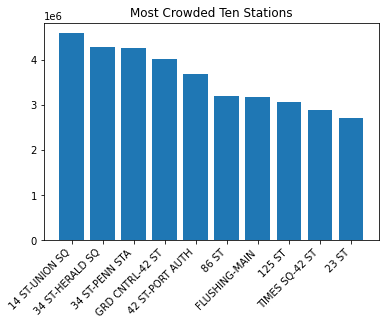

In [33]:
Crowded_stations_describe = Crowded_stations.describe()
plt.bar(Crowded_stations[:10].index, Crowded_stations[:10].TOTAL_PASS)
plt.xticks(rotation=45, ha='right')
plt.title('Most Crowded Ten Stations');

In [ ]:
Crowded_stations[:10].describe()

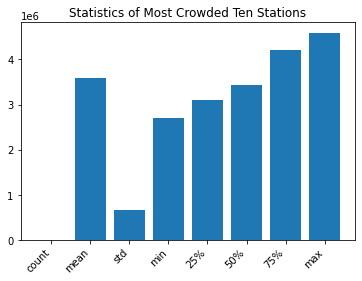

In [34]:
Crowded_stations_describe = Crowded_stations[:10].describe()
plt.bar(Crowded_stations_describe.index, Crowded_stations[:10].describe().TOTAL_PASS)
plt.xticks(rotation=45, ha='right')
plt.title('Statistics of Most Crowded Ten Stations');

In [36]:
Crowded_stations_days_ordered = Mta_pass_filtered.groupby(['DAY',"DAY_ORDER","STATION"]).agg({"TOTAL_PASS":"sum"}).reset_index()[['DAY',"DAY_ORDER","TOTAL_PASS","STATION"]].sort_values('TOTAL_PASS', ascending=False)


In [37]:
Crowded_stations_days_ordered

,DAY,DAY_ORDER,TOTAL_PASS,STATION
1460,Wednesday,2,892957,34 ST-PENN STA
1184,Tuesday,1,867202,34 ST-PENN STA
905,Thursday,3,859902,34 ST-PENN STA
1423,Wednesday,2,833132,14 ST-UNION SQ
1583,Wednesday,2,821771,GRD CNTRL-42 ST
...,...,...,...,...
718,Saturday,5,1504,UNION ST
1068,Thursday,3,1502,MYRTLE-WILLOUGH
456,Monday,0,1502,JAMAICA 179 ST
748,Sunday,6,1502,3 AV


In [38]:
# Top 5 stations filtered by days

Crowded_Days_First_Five_Stations_ = Crowded_stations_days_ordered.loc[(Crowded_stations_days_ordered.STATION=="14 ST-UNION SQ") |
                                                (Crowded_stations_days_ordered.STATION=="34 ST-HERALD SQ")| 
                                                (Crowded_stations_days_ordered.STATION=="34 ST-PENN STA")|
                                                (Crowded_stations_days_ordered.STATION=="GRD CNTRL-42 ST") |
                                    (Crowded_stations_days_ordered.STATION=="42 ST-PORT AUTH")].sort_values('TOTAL_PASS', ascending=False)

In [39]:
Crowded_Days_First_Five_Stations_

,DAY,DAY_ORDER,TOTAL_PASS,STATION
1460,Wednesday,2,892957,34 ST-PENN STA
1184,Tuesday,1,867202,34 ST-PENN STA
905,Thursday,3,859902,34 ST-PENN STA
1423,Wednesday,2,833132,14 ST-UNION SQ
1583,Wednesday,2,821771,GRD CNTRL-42 ST
1302,Tuesday,1,816307,GRD CNTRL-42 ST
870,Thursday,3,807087,14 ST-UNION SQ
1149,Tuesday,1,787204,14 ST-UNION SQ
1025,Thursday,3,785600,GRD CNTRL-42 ST
1458,Wednesday,2,773600,34 ST-HERALD SQ


In [40]:
#Top 5 stations sorted by DAY_ORDER
Crowded_Days_First_Five_Stations_.sort_values("DAY_ORDER", ascending=True)

,DAY,DAY_ORDER,TOTAL_PASS,STATION
332,Monday,0,529055,42 ST-PORT AUTH
324,Monday,0,603178,34 ST-HERALD SQ
326,Monday,0,585289,34 ST-PENN STA
290,Monday,0,650600,14 ST-UNION SQ
444,Monday,0,607371,GRD CNTRL-42 ST
1302,Tuesday,1,816307,GRD CNTRL-42 ST
1149,Tuesday,1,787204,14 ST-UNION SQ
1182,Tuesday,1,726513,34 ST-HERALD SQ
1190,Tuesday,1,665706,42 ST-PORT AUTH
1184,Tuesday,1,867202,34 ST-PENN STA


Text(0.5, 1.0, 'Most Crowded Five Stations Day By Day')

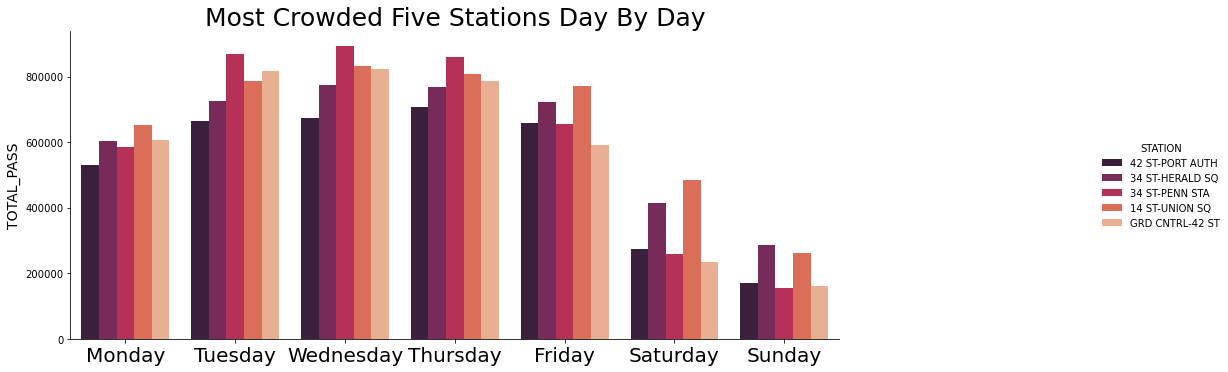

In [41]:
b = sns.catplot(x='DAY', y='TOTAL_PASS', hue='STATION',data=Crowded_Days_First_Five_Stations_.sort_values("DAY_ORDER", ascending=True), kind='bar', palette='rocket')
b.fig.set_figwidth(20)
plt.xlabel('')
plt.xticks(fontsize=20)
plt.ylabel('TOTAL_PASS', fontsize=14)
plt.title('Most Crowded Five Stations Day By Day' , fontsize=25)

In [42]:
Stations_Day_By_Day = Crowded_Days_First_Five_Stations_.sort_values("DAY_ORDER", ascending=True)

In [43]:
Stations_Day_By_Day

,DAY,DAY_ORDER,TOTAL_PASS,STATION
332,Monday,0,529055,42 ST-PORT AUTH
324,Monday,0,603178,34 ST-HERALD SQ
326,Monday,0,585289,34 ST-PENN STA
290,Monday,0,650600,14 ST-UNION SQ
444,Monday,0,607371,GRD CNTRL-42 ST
1302,Tuesday,1,816307,GRD CNTRL-42 ST
1149,Tuesday,1,787204,14 ST-UNION SQ
1182,Tuesday,1,726513,34 ST-HERALD SQ
1190,Tuesday,1,665706,42 ST-PORT AUTH
1184,Tuesday,1,867202,34 ST-PENN STA


In [44]:
# Before making the heatmap, the Pandas pivot function was used to reshape the data.
Stations_heatmap = Stations_Day_By_Day.pivot("STATION" ,"DAY" , "TOTAL_PASS")

In [45]:
Stations_heatmap

DAY,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
STATION,,,,,,,
14 ST-UNION SQ,770676,650600,485339,260321,807087,787204,833132
34 ST-HERALD SQ,721589,603178,415274,285150,769172,726513,773600
34 ST-PENN STA,653664,585289,257369,154919,859902,867202,892957
42 ST-PORT AUTH,659096,529055,274003,170232,706238,665706,671965
GRD CNTRL-42 ST,591396,607371,234364,159882,785600,816307,821771


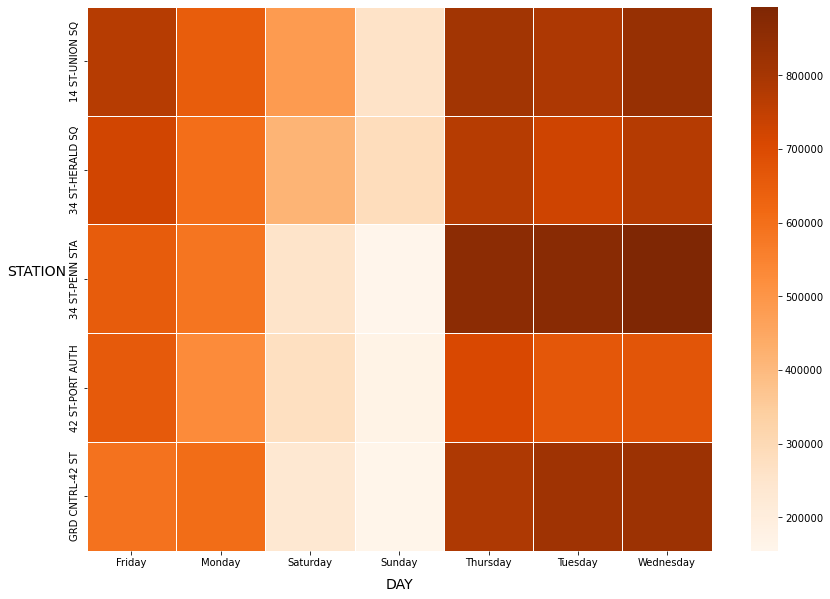

In [46]:
fig, ax = plt.subplots(figsize=(14,10))                                       

sns.heatmap(Stations_heatmap, cmap='Oranges',linewidth=1, annot=False,)           
ax.set_ylabel('STATION',fontsize=14,rotation=360, loc = 'center')              
ax.set_xlabel('DAY',fontsize=14,rotation=0)                                    
ax.yaxis.set_label_coords(-0.08,0.5)                                
ax.xaxis.set_label_coords(0.5, -0.05)
                                               

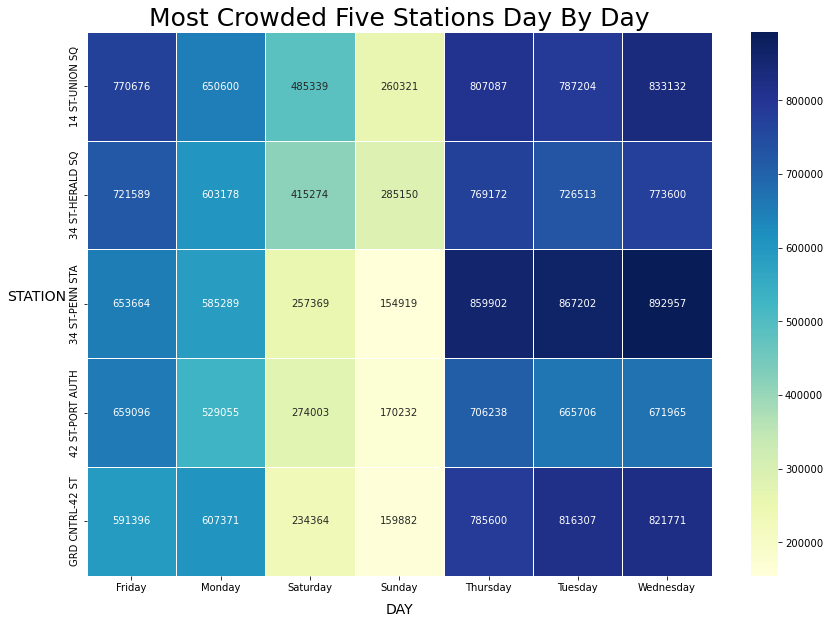

In [47]:
fig, ax = plt.subplots(figsize=(14,10))

g = sns.heatmap(Stations_heatmap, cmap='YlGnBu',linewidth=1, annot=True, fmt=("d"))         
ax.set_ylabel('STATION',fontsize=14,rotation=360, loc = 'center')                            
ax.set_xlabel('DAY',fontsize=14,rotation=0)
ax.yaxis.set_label_coords(-0.08,0.5)
ax.xaxis.set_label_coords(0.5, -0.05)
plt.title('Most Crowded Five Stations Day By Day' , fontsize=25);

# Total Passes every Four Hours by Station

Because of the input and output data are cumulative ,the data in the previous time zone was subtracted from the data in the next time zone.

In [49]:
MTA_dt['Time_Period_Entries'] = MTA_dt.groupby(['ID','STATION'])['ENTRIES'].diff()

In [ ]:
MTA_dt

In [50]:
MTA_dt['Time_Period_Exits'] = MTA_dt.groupby(['ID','STATION'])['EXITS'].diff()

In [ ]:
MTA_dt

In [51]:
MTA_dt['Time_Period_Entries_Exits'] = MTA_dt['Time_Period_Entries']+MTA_dt['Time_Period_Exits']

Since the first day of our data was 26.03.2022, Nan value came for the difference because there was no data for the previous day in those days.

In [52]:
MTA_dt[40:75]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ID,Time_Period_Entries,Time_Period_Exits,Time_Period_Entries_Exits
40,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2022,16:00:00,REGULAR,7698825,2686874,2022-04-01 16:00:00,"A002,R051,02-00-00",95.0,105.0,200.0
41,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2022,20:00:00,REGULAR,7698959,2686941,2022-04-01 20:00:00,"A002,R051,02-00-00",134.0,67.0,201.0
42,A002,R051,02-00-01,59 ST,NQR456W,BMT,03/26/2022,00:00:00,REGULAR,6811713,1582804,2022-03-26 00:00:00,"A002,R051,02-00-01",NaN,NaN,NaN
43,A002,R051,02-00-01,59 ST,NQR456W,BMT,03/26/2022,04:00:00,REGULAR,6811713,1582809,2022-03-26 04:00:00,"A002,R051,02-00-01",0.0,5.0,5.0
44,A002,R051,02-00-01,59 ST,NQR456W,BMT,03/26/2022,08:00:00,REGULAR,6811718,1582824,2022-03-26 08:00:00,"A002,R051,02-00-01",5.0,15.0,20.0
45,A002,R051,02-00-01,59 ST,NQR456W,BMT,03/26/2022,12:00:00,REGULAR,6811740,1582871,2022-03-26 12:00:00,"A002,R051,02-00-01",22.0,47.0,69.0
46,A002,R051,02-00-01,59 ST,NQR456W,BMT,03/26/2022,16:00:00,REGULAR,6811802,1582910,2022-03-26 16:00:00,"A002,R051,02-00-01",62.0,39.0,101.0
47,A002,R051,02-00-01,59 ST,NQR456W,BMT,03/26/2022,20:00:00,REGULAR,6811875,1582935,2022-03-26 20:00:00,"A002,R051,02-00-01",73.0,25.0,98.0
48,A002,R051,02-00-01,59 ST,NQR456W,BMT,03/27/2022,00:00:00,REGULAR,6811909,1582959,2022-03-27 00:00:00,"A002,R051,02-00-01",34.0,24.0,58.0
49,A002,R051,02-00-01,59 ST,NQR456W,BMT,03/27/2022,04:00:00,REGULAR,6811912,1582964,2022-03-27 04:00:00,"A002,R051,02-00-01",3.0,5.0,8.0


In [53]:
day_max =MTA_dt.groupby(['ID','STATION','TIME','DATETIME']).Time_Period_Entries_Exits.max().reset_index()

In [54]:
day_max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112631 entries, 0 to 2112630
Data columns (total 5 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   ID                         object        
 1   STATION                    object        
 2   TIME                       object        
 3   DATETIME                   datetime64[ns]
 4   Time_Period_Entries_Exits  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 80.6+ MB


I have 10 weeks of data and data is entered 6 times a day (with exceptions), it becomes 2112631/70/6=5030. I think the 5050 Nan value we found below is the data of 26.03.2022 in each turnstile and I drop them from the data.

In [55]:
day_max.isnull().sum()

ID                              0
STATION                         0
TIME                            0
DATETIME                        0
Time_Period_Entries_Exits    5050
dtype: int64

In [56]:
day_max.dropna(inplace=True)

In [57]:
day_max

,ID,STATION,TIME,DATETIME,Time_Period_Entries_Exits
1,"A002,R051,02-00-00",59 ST,00:00:00,2022-03-27 00:00:00,67.0
2,"A002,R051,02-00-00",59 ST,00:00:00,2022-03-28 00:00:00,38.0
3,"A002,R051,02-00-00",59 ST,00:00:00,2022-03-29 00:00:00,41.0
4,"A002,R051,02-00-00",59 ST,00:00:00,2022-03-30 00:00:00,44.0
5,"A002,R051,02-00-00",59 ST,00:00:00,2022-03-31 00:00:00,50.0
...,...,...,...,...,...
2112626,"TRAM2,R469,00-05-01",RIT-ROOSEVELT,21:00:00,2022-05-30 21:00:00,9.0
2112627,"TRAM2,R469,00-05-01",RIT-ROOSEVELT,21:00:00,2022-05-31 21:00:00,0.0
2112628,"TRAM2,R469,00-05-01",RIT-ROOSEVELT,21:00:00,2022-06-01 21:00:00,1.0
2112629,"TRAM2,R469,00-05-01",RIT-ROOSEVELT,21:00:00,2022-06-02 21:00:00,0.0


In [58]:
day_max.sort_values("Time_Period_Entries_Exits" , ascending=False)

,ID,STATION,TIME,DATETIME,Time_Period_Entries_Exits
1830768,"R412,R146,00-00-00",HUNTS POINT AV,13:00:00,2022-04-20 13:00:00,2.798042e+09
1011155,"N505,R022,02-06-00",34 ST-HERALD SQ,12:00:00,2022-04-13 12:00:00,2.049608e+09
1690409,"R249,R179,01-00-05",86 ST,20:00:00,2022-04-26 20:00:00,1.384572e+09
511965,"N043,R186,00-06-01",86 ST,16:00:00,2022-03-30 16:00:00,1.104756e+09
835285,"N310,R140,01-06-00",QUEENS PLAZA,13:00:00,2022-04-03 13:00:00,1.056965e+09
...,...,...,...,...,...
304117,"E014,R374,00-05-00",BAY PKWY,13:00:00,2022-05-29 13:00:00,-1.509977e+08
835106,"N310,R140,01-06-00",QUEENS PLAZA,01:00:00,2022-05-04 01:00:00,-2.516300e+08
2035868,"R622,R123,00-00-01",FRANKLIN AV,20:00:00,2022-06-02 20:00:00,-4.090618e+08
835424,"N310,R140,01-06-00",QUEENS PLAZA,21:00:00,2022-04-03 21:00:00,-1.056964e+09


Taking into account the calculation we made while filtering the number of daily passes on the basis of turnstiles, I take into account the data with a minimum of 250 and a maximum of 6700 passes on the basis of turnstiles in the data of four-hour passes.

In [59]:
day_max_filtered_quantity= day_max.loc[(day_max.Time_Period_Entries_Exits<6700) & 
                              (day_max.Time_Period_Entries_Exits>250)].reset_index().sort_values("Time_Period_Entries_Exits" , ascending=False)


I filter hourly data according to the five stations that I have identified as the most crowded in the daily data.

In [60]:
day_max_filtered_station= day_max_filtered_quantity.loc[(day_max_filtered_quantity.STATION=="14 ST-UNION SQ") |
                                                (day_max_filtered_quantity.STATION=="34 ST-HERALD SQ")| 
                                                (day_max_filtered_quantity.STATION=="34 ST-PENN STA")|
                                                (day_max_filtered_quantity.STATION=="GRD CNTRL-42 ST") |
                                    (day_max_filtered_quantity.STATION=="42 ST-PORT AUTH")].sort_values('Time_Period_Entries_Exits', ascending=False)

In [61]:
day_max_filtered_station

,index,ID,STATION,TIME,DATETIME,Time_Period_Entries_Exits
122335,554153,"N063A,R011,00-00-01",42 ST-PORT AUTH,00:00:00,2022-05-26 00:00:00,6307.0
122670,554570,"N063A,R011,00-00-02",42 ST-PORT AUTH,00:00:00,2022-05-26 00:00:00,5038.0
122999,554987,"N063A,R011,00-00-03",42 ST-PORT AUTH,00:00:00,2022-05-26 00:00:00,3791.0
123321,556238,"N063A,R011,00-00-06",42 ST-PORT AUTH,00:00:00,2022-05-26 00:00:00,3292.0
122272,554089,"N063A,R011,00-00-00",42 ST-PORT AUTH,20:00:00,2022-06-01 20:00:00,3050.0
...,...,...,...,...,...,...
129926,577101,"N072,R012,05-03-03",34 ST-PENN STA,12:00:00,2022-05-27 12:00:00,251.0
130854,580044,"N073,R013,02-00-03",34 ST-PENN STA,12:00:00,2022-05-11 12:00:00,251.0
354862,1632546,"R238,R046,00-00-07",GRD CNTRL-42 ST,20:00:00,2022-05-20 20:00:00,251.0
208965,1013641,"N506,R022,00-03-01",34 ST-HERALD SQ,12:00:00,2022-05-26 12:00:00,251.0


In [62]:
day_max_filtered_station['DAY']= day_max_filtered_station['DATETIME'].dt.day_name()
day_max_filtered_station['DAY_ORDER']= day_max_filtered_station['DATETIME'].dt.weekday

In [63]:
# the order of the 5 most crowded stations according to the number of 4-hour passes(Time_Period_Entries_Exits)
day_max_filtered_station_time =day_max_filtered_station.groupby(["STATION","DAY","TIME"]).sum().Time_Period_Entries_Exits.reset_index().sort_values("Time_Period_Entries_Exits" , ascending=False)

In [64]:
day_max_filtered_station_time[:40]

,STATION,DAY,TIME,Time_Period_Entries_Exits
66,34 ST-HERALD SQ,Thursday,20:00:00,353434.0
162,34 ST-PENN STA,Wednesday,20:00:00,351204.0
149,34 ST-PENN STA,Tuesday,20:00:00,349063.0
136,34 ST-PENN STA,Thursday,20:00:00,345653.0
43,34 ST-HERALD SQ,Friday,20:00:00,342066.0
73,34 ST-HERALD SQ,Tuesday,20:00:00,336992.0
83,34 ST-HERALD SQ,Wednesday,20:00:00,336612.0
94,34 ST-PENN STA,Friday,20:00:00,296230.0
48,34 ST-HERALD SQ,Monday,20:00:00,294624.0
3,14 ST-UNION SQ,Friday,17:00:00,271493.0


While examining the time zones to determine the hourly density at the stations, 

I saw that there were data entries other than 00:00 - 04:00 ...16:00-20:00 time zones (such as 01:00-07:42-.13:00 etc.) 

Then I added the transitions in time zones other than 00:00 - 04:00 ...16:00-20:00 to the next time zone, assuming that each data represents the previous 4 hour transition. And I added the resulting added time zones to the data with the column name NEW_TIME.

In [65]:
day_max_filtered_station_time["NEW_TIME"]=day_max_filtered_station_time["TIME"].apply(lambda x: "04:00:00" if x > "00:00:00" and x<= "04:00:00" else("08:00:00" if x > "04:00:00" and x<="08:00:00" else("12:00:00" if x>"08:00:00" and x<="12:00:00" else("16:00:00" if x>"12:00:00" and x<="16:00:00" else("20:00:00" if x> "16:00:00" and x<="20:00:00" else("00:00:00" if x> "20:00:00" and x<="00:00:00" else "00:00:00"))))))

In [67]:
day_max_filtered_station_time

,STATION,DAY,TIME,Time_Period_Entries_Exits,NEW_TIME
66,34 ST-HERALD SQ,Thursday,20:00:00,353434.0,20:00:00
162,34 ST-PENN STA,Wednesday,20:00:00,351204.0,20:00:00
149,34 ST-PENN STA,Tuesday,20:00:00,349063.0,20:00:00
136,34 ST-PENN STA,Thursday,20:00:00,345653.0,20:00:00
43,34 ST-HERALD SQ,Friday,20:00:00,342066.0,20:00:00
...,...,...,...,...,...
60,34 ST-HERALD SQ,Sunday,22:05:11,291.0,00:00:00
61,34 ST-HERALD SQ,Sunday,23:31:21,291.0,00:00:00
227,42 ST-PORT AUTH,Wednesday,08:35:06,282.0,12:00:00
108,34 ST-PENN STA,Saturday,08:00:00,268.0,08:00:00


I calculated and sorted the sum of the data(Time_Period_Entries_Exits) in each time zone according to the NEW_TIME column

In [68]:
day_max_filtered_station_times = day_max_filtered_station_time.groupby(["STATION","DAY","NEW_TIME"]).sum().Time_Period_Entries_Exits.reset_index().sort_values("Time_Period_Entries_Exits" , ascending=False)

In [69]:
day_max_filtered_station_times

,STATION,DAY,NEW_TIME,Time_Period_Entries_Exits
111,34 ST-PENN STA,Wednesday,20:00:00,488107.0
105,34 ST-PENN STA,Tuesday,20:00:00,485855.0
99,34 ST-PENN STA,Thursday,20:00:00,482596.0
76,34 ST-PENN STA,Friday,20:00:00,424840.0
82,34 ST-PENN STA,Monday,20:00:00,382861.0
...,...,...,...,...
119,42 ST-PORT AUTH,Monday,04:00:00,798.0
78,34 ST-PENN STA,Monday,04:00:00,568.0
142,42 ST-PORT AUTH,Tuesday,04:00:00,539.0
52,34 ST-HERALD SQ,Sunday,08:00:00,532.0


While creating the pivot table, the time data in the NEW_TIME column was treated as duplicate data and giving an error code. 

To avoid this situation, I combined the DAY and NEW_TIME columns with the name DAY_AND_TIME.

In [70]:
day_max_filtered_station_times["DAY_AND_TIME"]=day_max_filtered_station_times["DAY"]+' '+day_max_filtered_station_times["NEW_TIME"]

In [73]:
day_max_filtered_station_times

,STATION,DAY,NEW_TIME,Time_Period_Entries_Exits,DAY_AND_TIME
111,34 ST-PENN STA,Wednesday,20:00:00,488107.0,Wednesday 20:00:00
105,34 ST-PENN STA,Tuesday,20:00:00,485855.0,Tuesday 20:00:00
99,34 ST-PENN STA,Thursday,20:00:00,482596.0,Thursday 20:00:00
76,34 ST-PENN STA,Friday,20:00:00,424840.0,Friday 20:00:00
82,34 ST-PENN STA,Monday,20:00:00,382861.0,Monday 20:00:00
...,...,...,...,...,...
119,42 ST-PORT AUTH,Monday,04:00:00,798.0,Monday 04:00:00
78,34 ST-PENN STA,Monday,04:00:00,568.0,Monday 04:00:00
142,42 ST-PORT AUTH,Tuesday,04:00:00,539.0,Tuesday 04:00:00
52,34 ST-HERALD SQ,Sunday,08:00:00,532.0,Sunday 08:00:00


To make the heatmap more understandable, I created a pivot table by including only the first 40 data.

In [72]:
Stations_heatmap2 = day_max_filtered_station_times[:40].pivot("STATION" ,"DAY_AND_TIME" , "Time_Period_Entries_Exits")

In [74]:
Stations_heatmap2

DAY_AND_TIME,Friday 12:00:00,Friday 16:00:00,Friday 20:00:00,Monday 12:00:00,Monday 20:00:00,Thursday 00:00:00,Thursday 12:00:00,Thursday 20:00:00,Tuesday 00:00:00,Tuesday 12:00:00,Tuesday 20:00:00,Wednesday 00:00:00,Wednesday 12:00:00,Wednesday 20:00:00
STATION,,,,,,,,,,,,,,
14 ST-UNION SQ,NaN,NaN,271493.0,NaN,NaN,241157.0,NaN,258059.0,237109.0,NaN,246830.0,244112.0,NaN,250242.0
34 ST-HERALD SQ,NaN,240881.0,342066.0,NaN,294624.0,NaN,248767.0,353434.0,NaN,248587.0,336992.0,NaN,255667.0,348490.0
34 ST-PENN STA,246007.0,270117.0,424840.0,268124.0,382861.0,NaN,333514.0,482596.0,NaN,349113.0,485855.0,NaN,353812.0,488107.0
42 ST-PORT AUTH,NaN,NaN,250231.0,NaN,NaN,NaN,NaN,270009.0,NaN,NaN,261107.0,NaN,NaN,255824.0
GRD CNTRL-42 ST,NaN,NaN,280094.0,241454.0,252971.0,NaN,298448.0,317555.0,NaN,317884.0,309566.0,NaN,315008.0,319728.0


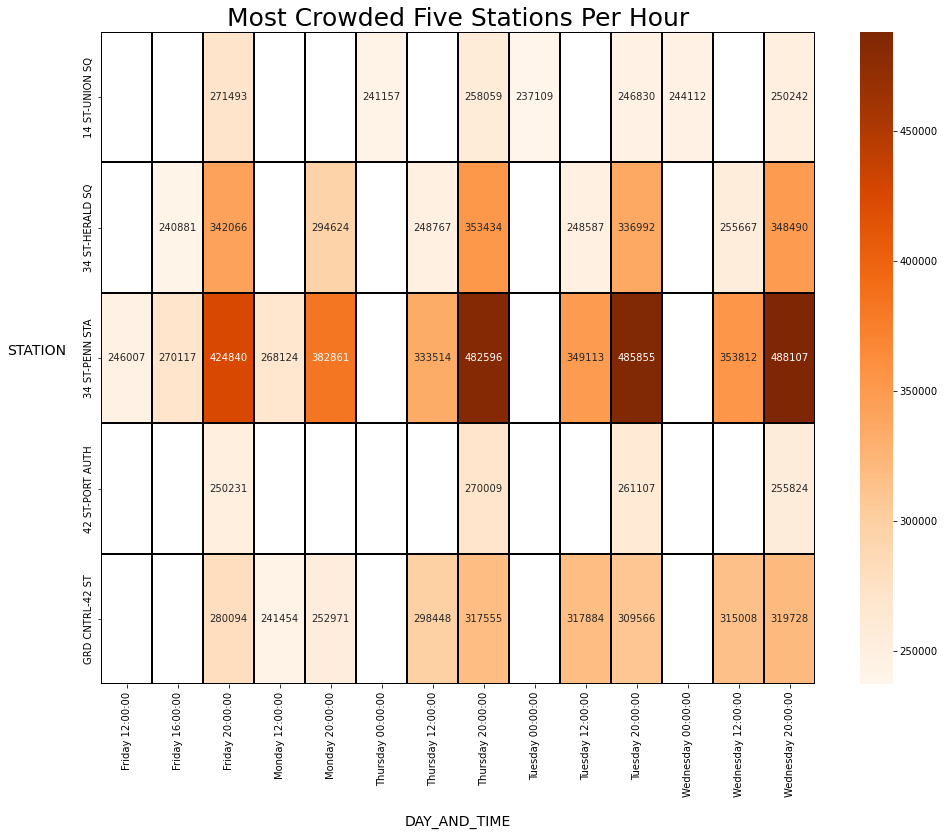

In [75]:
fig, ax = plt.subplots(figsize=(16,12))

g = sns.heatmap(Stations_heatmap2, cmap='Oranges',linewidth=2,linecolor='black', annot=True , fmt=("3g") )
ax.set_ylabel('STATION',fontsize=14,rotation=360, loc = 'center')
ax.set_xlabel('DAY_AND_TIME',fontsize=14)
ax.yaxis.set_label_coords(-0.09,0.5)
ax.xaxis.set_label_coords(0.5, -0.2)
plt.title('Most Crowded Five Stations Per Hour' , fontsize=25);